# Ejercicio de Cluster (Ejemplo de K-means)
Haremos un ejercicio muy breve de análisis de cluster en python


In [ ]:
# Preparamos el entorno en Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Luego miramos y analizamos los datos con algunas métricas base

In [ ]:
datos = pd.read_csv('/content/Datos_compra.csv')
datos.head()

,gender,height,handsize,age,gaming,chat,maps,video,social,reading,total_minutes,days_ago,years_ago,discount,phone_id,brand,size_cat,price,screen_size
0,female,71.0,7.88,20,316.436544,281.938305,77.016074,499.804480,176.045230,93.409135,1444.649767,852.767251,3,NaN,H2,huawei,l,699.0,5.7
1,male,64.6,5.63,20,441.510740,163.202311,17.496274,587.558106,104.325127,62.280162,1376.372721,834.474822,3,H1,H2,huawei,l,699.0,5.7
2,male,66.8,7.50,20,244.726902,361.834186,142.569650,356.602749,318.795082,82.700541,1507.229110,947.657208,3,S2,A1,apple,s,749.0,5.5
3,male,67.3,5.97,19,385.905312,201.970353,82.730194,537.893285,244.429449,116.935911,1569.864505,400.641410,2,S1,H1,huawei,s,699.0,5.7
4,male,68.1,6.71,19,204.243493,407.604492,143.676724,241.993243,344.192753,67.492025,1409.202730,555.876603,2,A1,S1,samsung,s,749.0,5.8


Debemos reescalas los datos. Esto implica normalizar o cambiar su forma en escala normal. Una idea de ello es cuando se aplica la formuña de:

$$\text{escala}=\frac{x_i-\bar{x}}{s.d(x)}$$

De tal forma que restamos la **media** o **promedio** de valores y luego dividimos entre su desviación estandar (s.d). Desde luego solo podemos *clusterizar* por variables cuantitativas o númericas. Vamos a seleccionar solo un par de variables (*las que crea el investigador conveniente*) para lograr generar un cluster por condiciones.

In [ ]:
datos_sel=datos.loc[:, ['gaming', 'handsize']] # Tomamos dos opciones incluso por escala de Y,X y tenemos minutos de juego y tamaño de smartphone

In [ ]:
datos_sel.head()

,gaming,handsize
0,316.436544,7.88
1,441.510740,5.63
2,244.726902,7.50
3,385.905312,5.97
4,204.243493,6.71


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos_escala = scaler.fit_transform(datos_sel)

Los miramos a ver como van:

In [ ]:
datos_escala

array([[ 0.5093238 ,  0.66061517],
       [ 1.35095186, -1.26115992],
       [ 0.02678745,  0.33604871],
       ...,
       [-0.39680236, -1.28678359],
       [-1.25527569,  1.4634901 ],
       [ 1.69511471,  0.38729605]])

Ya reescalados los datos, podemos empezar a trabajar con ellos para la clusterización. El paso a continuación implica entonces trabajar o intentar optimizar el número de cluster ideal para eso.

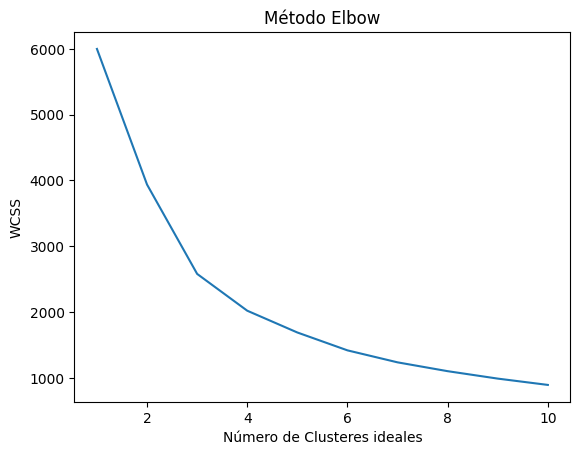

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(datos_escala) # Base de datos escalada
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusteres ideales')
plt.ylabel('WCSS') # Optimizador
plt.show()

A parecer lo mejor habita entre la elección de $K=2$ o $K=3$ en esta versión

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(datos_escala)

Ya por último queda solo gráficar:

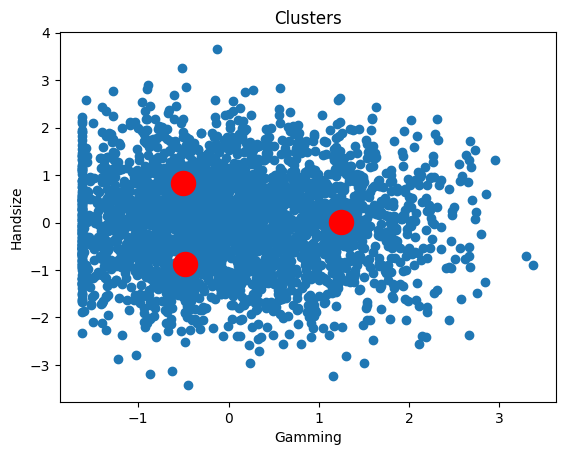

In [ ]:
plt.scatter(datos_escala[:,0], datos_escala[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')
plt.xlabel('Gamming')
plt.ylabel('Handsize')
plt.show()

Si queremos ver que grupo tenemos

In [ ]:
pred_y

array([0, 0, 2, ..., 1, 2, 0], dtype=int32)

In [ ]:
y = pd.DataFrame(pred_y, columns=['Cluster'])
datos['Identificador']=y
datos.head()

,gender,height,handsize,age,gaming,chat,maps,video,social,reading,total_minutes,days_ago,years_ago,discount,phone_id,brand,size_cat,price,screen_size,Identificador
0,female,71.0,7.88,20,316.436544,281.938305,77.016074,499.804480,176.045230,93.409135,1444.649767,852.767251,3,NaN,H2,huawei,l,699.0,5.7,0
1,male,64.6,5.63,20,441.510740,163.202311,17.496274,587.558106,104.325127,62.280162,1376.372721,834.474822,3,H1,H2,huawei,l,699.0,5.7,0
2,male,66.8,7.50,20,244.726902,361.834186,142.569650,356.602749,318.795082,82.700541,1507.229110,947.657208,3,S2,A1,apple,s,749.0,5.5,2
3,male,67.3,5.97,19,385.905312,201.970353,82.730194,537.893285,244.429449,116.935911,1569.864505,400.641410,2,S1,H1,huawei,s,699.0,5.7,0
4,male,68.1,6.71,19,204.243493,407.604492,143.676724,241.993243,344.192753,67.492025,1409.202730,555.876603,2,A1,S1,samsung,s,749.0,5.8,1


Desde luego despues de realizado el trabajo. Quiero ver los resultados en un Excel. Una forma de hacerlo es con:

In [ ]:
# Especificar el nombre del archivo Excel
archivo = 'datos.xlsx'

# Exportar el DataFrame a un archivo Excel
datos.to_excel(archivo, index=False)

In [ ]:
datos.groupby("Identificador")[["gaming", "handsize", "price"]].median()

,gaming,handsize,price
Identificador,,,
0,417.498612,7.13,799.0
1,174.751940,6.22,749.0
2,167.212911,7.92,799.0


# PCA (Segmentación por Componentes Principales)

Ahora realizamos un ejercicio un poco mas completo. Importamos desde collab un grupo de paquetes y con eso, sacamos adelante la clasificación.



Usamos misma base. Pero ahora intentaremos usar una variable cualitativa que nos ayudará con *etiquetas* de identificación por grupos de consumidores de marcas o **brands**

   gender  height  handsize  age      gaming        chat        maps  \
0  female    71.0      7.88   20  316.436544  281.938305   77.016074   
1    male    64.6      5.63   20  441.510740  163.202311   17.496274   
2    male    66.8      7.50   20  244.726902  361.834186  142.569650   
3    male    67.3      5.97   19  385.905312  201.970353   82.730194   
4    male    68.1      6.71   19  204.243493  407.604492  143.676724   

        video      social     reading  total_minutes    days_ago  years_ago  \
0  499.804480  176.045230   93.409135    1444.649767  852.767251          3   
1  587.558106  104.325127   62.280162    1376.372721  834.474822          3   
2  356.602749  318.795082   82.700541    1507.229110  947.657208          3   
3  537.893285  244.429449  116.935911    1569.864505  400.641410          2   
4  241.993243  344.192753   67.492025    1409.202730  555.876603          2   

  discount phone_id    brand size_cat  price  screen_size  
0      NaN       H2   huawei    

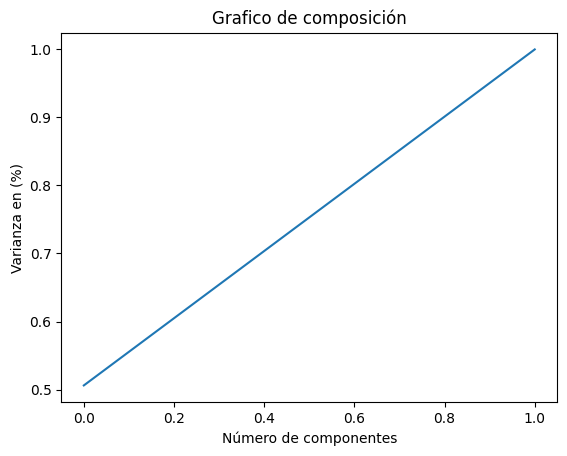

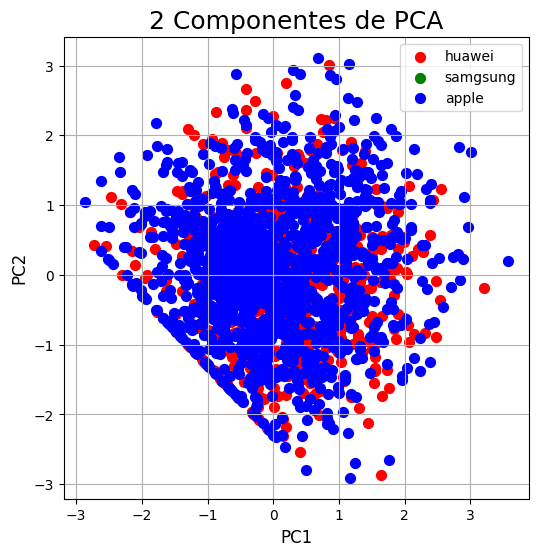

In [ ]:
# Importar modulos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar datos
datos = pd.read_csv('/content/Datos_compra.csv')
print(datos.head())

# Estandarizamos los datos
x = datos.loc[:, ['gaming', 'handsize']]
x = StandardScaler().fit_transform(x)

# Armamos el PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(x)

# Nuestra Brand o marca sera el target e involucramos componentes principales
principal_df = pd.DataFrame(data=componentes_principales, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, datos[['brand']]], axis=1)

# Gráfico de explicación de la varianza en general
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza en (%)')
plt.title('Grafico de composición')
plt.show()

# Gráfico final armado
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('2 Componentes de PCA', fontsize=18)
targets = ['huawei', 'samgsung', 'apple']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['brand'] == target
    ax.scatter(final_df.loc[indices_to_keep, 'PC1'], final_df.loc[indices_to_keep, 'PC2'], c=color, s=50)
ax.legend(targets)
ax.grid()
plt.show()

In [ ]:
final_df.groupby("brand")[["PC1", "PC2"]].median()

,PC1,PC2
brand,,
apple,-0.072543,0.012195
huawei,0.126292,-0.176532
samsung,-0.151231,-0.018375
